# GIS with ![Python](https://www.python.org/static/community_logos/python-logo-inkscape.svg) and ![IPython](https://ipython.org/_static/IPy_header.png) 

# Getting some data

There are many sources of GIS data. Here are some useful links:

* [WorldMap](http://worldmap.harvard.edu/)
* [FAO's GeoNetwork](http://www.fao.org/geonetwork)
* [IPUMS USA Boundary files for Censuses](https://usa.ipums.org/usa/volii/boundaries.shtml)
* [IPUMS International Boundary files for Censuses](https://international.ipums.org/international/gis.shtml)
* [GADM database of Global Administrative Areas](http://www.gadm.org/)
* [Global Administrative Unit Layers](http://www.fao.org/geonetwork/srv/en/metadata.show?id=12691)
* [Natural Earth](http://www.naturalearthdata.com/): All kinds of geographical, cultural and socioeconomic variables
* [Global Map](http://www.iscgm.org/cgi-bin/fswiki/wiki.cgi?page=Summary)
* [Digital Chart of the World](http://worldmap.harvard.edu/data/geonode:Digital_Chart_of_the_World)
* [Sage](http://www.sage.wisc.edu/mapsdatamodels.html) and [Sage Atlas](http://www.sage.wisc.edu/atlas/maps.php)
* [Caloric Suitability Index CSI](https://ozak.github.io/Caloric-Suitability-Index/): Agricultural suitability data

* [Ramankutti's Datasets on land use, crops, etc.](http://www.geog.mcgill.ca/~nramankutty/Datasets/Datasets.html)
* [SEDAC at Columbia Univesrity](http://sedac.ciesin.columbia.edu/data/sets/browse): Gridded Population, Hazzards, etc.
* [World Port Index](http://msi.nga.mil/NGAPortal/MSI.portal?_nfpb=true&_pageLabel=msi_portal_page_62&pubCode=0015)
* [USGS elevation maps](http://eros.usgs.gov/elevation-products)
* [NOOA's Global Land One-km Base Elevation Project (GLOBE)](http://www.ngdc.noaa.gov/mgg/topo/globe.html)
* [NOOA Nightlight data](http://ngdc.noaa.gov/eog/download.html): This is the data used by Henderson, Storeygard, and Weil AER 2012 paper.
* [Other NOOA Data](http://www.ngdc.noaa.gov/ngdcinfo/onlineaccess.html)
* [GEcon](http://gecon.yale.edu/)
* [OpenStreetMap](http://openstreetmap.org)
* [U.S. Census TIGER](http://www.census.gov/geo/maps-data/data/tiger.html)
* [Geo-referencing of Ethnic Groups](http://www.icr.ethz.ch/data/other/greg)

See also [Wikipedia links](http://en.wikipedia.org/wiki/List_of_GIS_data_sources)

# Set-up

Let's import the packages we will use and set the paths for outputs.

In [1]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np
import os, sys

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
# GIS packages
import geopandas as gpd
from geopandas.tools import overlay
from shapely.geometry import Polygon, Point
import georasters as gr
# Alias for Geopandas
gp = gpd

In [3]:
# Plotting
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

In [4]:
# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

# Initial Example -- Natural Earth Country Shapefile

Let's download a shapefile with all the polygons for countries so we can visualize and analyze some of the data we have downloaded in other notebooks. [Natural Earth](https://www.naturalearthdata.com/downloads/) provides lots of free data so let's use that one. 

For shapefiles and other polygon type data ``geopandas`` is the most useful package. ``geopandas`` is to GIS  what ``pandas`` is to other data. Since ``gepandas`` extends the functionality of ``pandas`` to a GIS dataset, all the nice functions and properties of ``pandas`` are also available in ``geopandas``. Of course, ``geopandas`` includes functions and properties unique to GIS data.

Next we will use it to download the shapefile (which is contained in a zip archive). ``geopandas`` extends ``pandas`` for use with GIS data. We can  use many functions and properties of the ``GeoDataFrame`` to analyze our data. 

In [5]:
import requests
import io

#headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip'
r = requests.get(url, headers=headers)
countries = gp.read_file(io.BytesIO(r.content))
#countries = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip')

Let's look inside this ``GeoDataFrame``

In [6]:
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Each row contains the information for one country. 

Each column is one property or variable. 

Unlike ``pandas`` ``DataFrame``s, ``geopandas`` always must have a ``geometry`` column. 

Let's plot this data

Text(0.5, 1.0, 'WGS84 (lat/lon)')

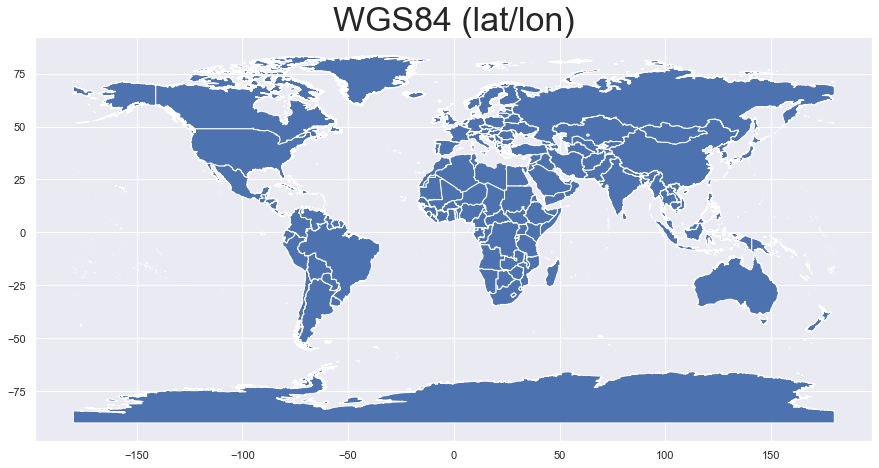

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(ax=ax)
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

We can also get some additional information on this data. For example its projection

In [8]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can reproject the data from its current WGS84 projection to other ones. Let's do this and plot the results so we can see how different projections distort results.

Text(0.5, 1.0, 'Mercator')

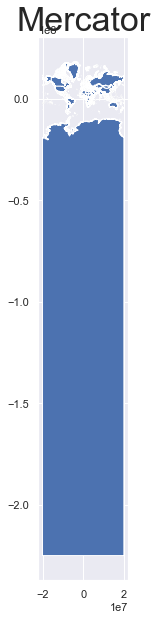

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
countries_merc = countries.to_crs(epsg=3395)
countries_merc.plot(ax=ax)
ax.set_title("Mercator", fontdict={'fontsize':34})

Text(0.5, 1.0, 'Cylindrical Equal Area')

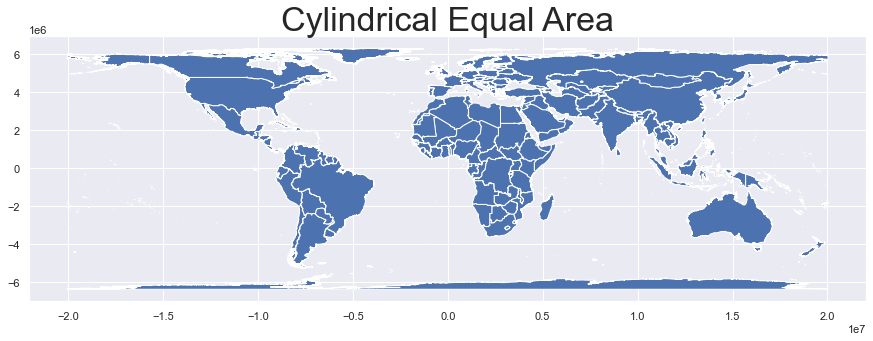

In [10]:
cea = {'datum': 'WGS84',
 'lat_ts': 0,
 'lon_0': 0,
 'no_defs': True,
 'over': True,
 'proj': 'cea',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

fig, ax = plt.subplots(figsize=(15,10))
countries_cea = countries.to_crs(crs=cea)
countries_cea.plot(ax=ax)
ax.set_title("Cylindrical Equal Area", fontdict={'fontsize':34})

Notice that each projection shows the world in a very different manner, distoring areas, distances etc. So you need to take care when doing computations to use the correct projection. An important issue to remember is that you need a projected (not geographical) projection to compute areas and distances. Let's compare these three a bit. Start with the boundaries of each.

In [11]:
print('[xmin, ymin, xmax, ymax] in three projections')
print(countries.total_bounds)
print(countries_merc.total_bounds)
print(countries_cea.total_bounds)

[xmin, ymin, xmax, ymax] in three projections
[-180.          -90.          180.           83.63410065]
[-2.00375083e+07 -2.25002355e+08  2.00375083e+07  1.83863917e+07]
[-20037508.34278923  -6363885.33192604  20037508.34278924
   6324296.52646162]


Let's describe the areas of these countries in the three projections

In [12]:
print('Area distribution in WGS84')
print(countries.area.describe(), '\n')

Area distribution in WGS84
count     258.000000
mean       83.053683
std       443.786684
min         0.000001
25%         0.065859
50%         5.857276
75%        37.279026
max      6049.574693
dtype: float64 



/var/folders/q1/7qsx8kmj439d81kr4f_k_wbr0000gp/T/ipykernel_88099/1371744286.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(countries.area.describe(), '\n')


In [13]:
print('Area distribution in Mercator')
print(countries_merc.area.describe(), '\n')

Area distribution in Mercator
count    2.580000e+02
mean     3.422771e+13
std      5.295871e+14
min      2.196509e+04
25%      9.736132e+08
50%      8.654572e+10
75%      5.377488e+11
max      8.507019e+15
dtype: float64 



In [14]:
print('Area distribution in CEA')
print(countries_cea.area.describe(), '\n')

Area distribution in CEA
count    2.580000e+02
mean     5.690945e+11
std      1.826917e+12
min      1.220383e+04
25%      6.986659e+08
50%      5.148888e+10
75%      3.544773e+11
max      1.698019e+13
dtype: float64 



Let's compare the area of each country in the two projected projections

Text(0.5, 1.0, 'Areas')

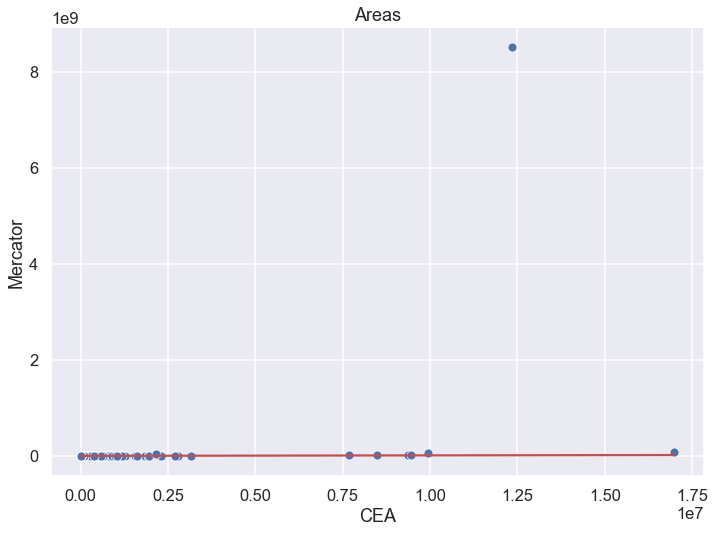

In [15]:
countries_merc = countries_merc.set_index('ADM0_A3')
countries_cea = countries_cea.set_index('ADM0_A3')
countries_merc['ratio_area'] = countries_merc.area / countries_cea.area
countries_cea['ratio_area'] = countries_merc.area / countries_cea.area
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")
fig, ax = plt.subplots()
sns.scatterplot(x=countries_cea.area/1e6, y=countries_merc.area/1e6, ax=ax)
sns.lineplot(x=countries_cea.area/1e6, y=countries_cea.area/1e6, color='r', ax=ax)
ax.set_ylabel('Mercator')
ax.set_xlabel('CEA')
ax.set_title("Areas")

Now, how do we know what is correct? Let's get some data from WDI to compare the areas of countries in these projections to what the correct area should be (notice that each country usually will use a local projection that ensures areas are correctly computed, so their data should be closer to the truth than any of our global ones). 

Here we use some of what we learned before in [this notebook](./EconomicDataAnalysis.ipynb).

In [16]:
from pandas_datareader import data, wb
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()
wdi = wb.download(indicator=['AG.LND.TOTL.K2'], country=wbcountries.iso2c.values, start=2017, end=2017)
wdi.columns = ['WDI_area']
wdi = wdi.reset_index()
wdi = wdi.merge(wbcountries[['iso3c', 'iso2c', 'name']], left_on='country', right_on='name')

countries_cea['CEA_area'] = countries_cea.area / 1e6
countries_merc['MERC_area'] = countries_merc.area / 1e6
areas = pd.merge(countries_cea['CEA_area'], countries_merc['MERC_area'], left_index=True, right_index=True)

/Users/ozak/anaconda3/envs/GeoPython39env/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(


Let's merge the WDI data with what we have computed before.

In [17]:
wdi = wdi.merge(areas, left_on='iso3c', right_index=True)
wdi

,country,year,WDI_area,iso3c,iso2c,name,CEA_area,MERC_area
0,Aruba,2017,180.0,ABW,AW,Aruba,1.697662e+02,1.780777e+02
2,Afghanistan,2017,652860.0,AFG,AF,Afghanistan,6.421811e+05,9.306783e+05
4,Angola,2017,1246700.0,AGO,AO,Angola,1.244652e+06,1.307625e+06
5,Albania,2017,27400.0,ALB,AL,Albania,2.833579e+04,4.983393e+04
6,Andorra,2017,470.0,AND,AD,Andorra,4.522394e+02,8.305222e+02
...,...,...,...,...,...,...,...,...
260,Samoa,2017,2830.0,WSM,WS,Samoa,2.780425e+03,2.945930e+03
262,"Yemen, Rep.",2017,527970.0,YEM,YE,"Yemen, Rep.",4.530748e+05,4.899480e+05
263,South Africa,2017,1213090.0,ZAF,ZA,South Africa,1.219825e+06,1.597733e+06
264,Zambia,2017,743390.0,ZMB,ZM,Zambia,7.519143e+05,7.960516e+05


How correlated are these measures?

In [18]:
wdi.corr()

,WDI_area,CEA_area,MERC_area
WDI_area,1.000000,0.997178,0.821555
CEA_area,0.997178,1.000000,0.852409
MERC_area,0.821555,0.852409,1.000000


Let's change the shape of the data so we can plot it using ``seaborn``.

In [19]:
wdi2 = wdi.melt(id_vars=['iso3c', 'iso2c', 'name', 'country', 'year', 'WDI_area'], value_vars=['CEA_area', 'MERC_area'])
wdi2

,iso3c,iso2c,name,country,year,WDI_area,variable,value
0,ABW,AW,Aruba,Aruba,2017,180.0,CEA_area,1.697662e+02
1,AFG,AF,Afghanistan,Afghanistan,2017,652860.0,CEA_area,6.421811e+05
2,AGO,AO,Angola,Angola,2017,1246700.0,CEA_area,1.244652e+06
3,ALB,AL,Albania,Albania,2017,27400.0,CEA_area,2.833579e+04
4,AND,AD,Andorra,Andorra,2017,470.0,CEA_area,4.522394e+02
...,...,...,...,...,...,...,...,...
421,WSM,WS,Samoa,Samoa,2017,2830.0,MERC_area,2.945930e+03
422,YEM,YE,"Yemen, Rep.","Yemen, Rep.",2017,527970.0,MERC_area,4.899480e+05
423,ZAF,ZA,South Africa,South Africa,2017,1213090.0,MERC_area,1.597733e+06
424,ZMB,ZM,Zambia,Zambia,2017,743390.0,MERC_area,7.960516e+05


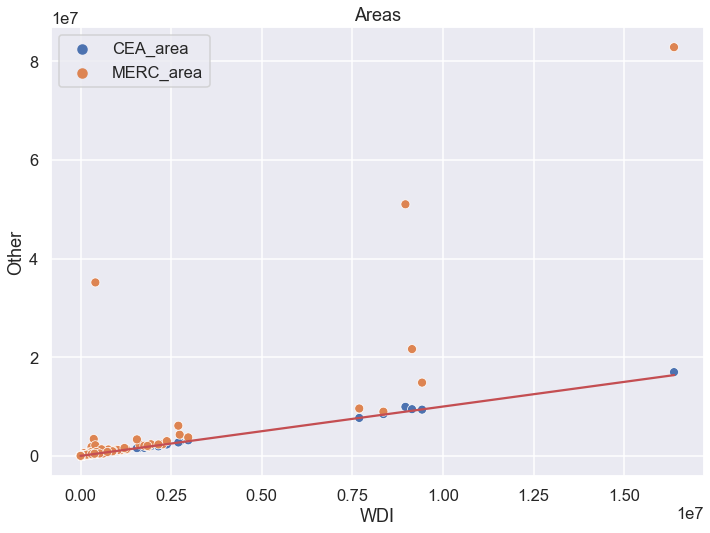

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")
fig, ax = plt.subplots()
sns.scatterplot(x='WDI_area', y='value', data=wdi2, hue='variable', ax=ax)
#sns.scatterplot(x='WDI_area', y='MERC_area', data=wdi, ax=ax)
sns.lineplot(x='WDI_area', y='WDI_area', data=wdi, color='r', ax=ax)
ax.set_ylabel('Other')
ax.set_xlabel('WDI')
ax.set_title("Areas")
ax.legend()

We could use other data to compare, e.g. data from the CIA Factbook.

In [21]:
cia_area = pd.read_csv('https://web.archive.org/web/20201116182145if_/https://www.cia.gov/LIBRARY/publications/the-world-factbook/rankorder/rawdata_2147.txt', sep='\t', header=None)
cia_area = pd.DataFrame(cia_area[0].str.strip().str.split('\s\s+').tolist(), columns=['id', 'Name', 'area'])
cia_area.area = cia_area.area.str.replace(',', '').astype(int)
cia_area

,id,Name,area
0,1,Russia,17098242
1,2,Antarctica,14000000
2,3,Canada,9984670
3,4,United States,9833517
4,5,China,9596960
...,...,...,...
249,250,Spratly Islands,5
250,251,Ashmore and Cartier Islands,5
251,252,Coral Sea Islands,3
252,253,Monaco,2


In [22]:
print('CEA area for Russia', countries_cea.area.loc['RUS'] / 1e6)
print('MERC area for Russia', countries_merc.area.loc['RUS'] / 1e6)
print('WDI area for Russia', wdi.loc[wdi.iso3c=='RUS', 'WDI_area'])
print('CIA area for Russia', cia_area.loc[cia_area.Name=='Russia', 'area'])

CEA area for Russia 16980189.499200087
MERC area for Russia 82883546.83332941
WDI area for Russia 202    16376870.0
Name: WDI_area, dtype: float64
CIA area for Russia 0    17098242
Name: area, dtype: int64


Again very similar result. ``CEA`` is closest to both ``WDI`` and ``CIA``. 

## Exercise

1. Merge the ``CIA`` data with the wdi data. You need to get correct codes for the countries to allow for the merge or correct the names to ensure they are compatible.
2. Change the dataframe as we did with ``wdi2`` and plot the association between these measures

# Mapping data

Let's use the ``geoplot`` package to plot data in a map. As usual we can do it in many ways, but ``geoplot``  makes our life very easy. Let's import the various packages we will use.

In [23]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

Let's import some of the data we had downloaded before. Specifically, let's import the Penn World Tables data.

In [24]:
pwt = pd.read_stata(pathout + 'pwt91.dta')
pwt_xls = pd.read_excel(pathout + 'pwt91.xlsx')
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,ZWE,Zimbabwe,US Dollar,2013,28086.937500,28329.810547,15.054506,7.914061,NaN,2.504635,...,0.169638,-0.426188,0.090225,0.577488,0.582022,0.448409,0.723247,0.632360,0.383488,0.704313
12372,ZWE,Zimbabwe,US Dollar,2014,29217.554688,29355.759766,15.411675,8.222112,NaN,2.550258,...,0.141791,-0.340442,0.051500,0.600760,0.557172,0.392895,0.724510,0.628352,0.349735,0.704991
12373,ZWE,Zimbabwe,US Dollar,2015,30091.923828,29150.750000,15.777451,8.530669,NaN,2.584653,...,0.137558,-0.354298,-0.023353,0.622927,0.580814,0.343926,0.654940,0.564430,0.348472,0.713156
12374,ZWE,Zimbabwe,US Dollar,2016,30974.292969,29420.449219,16.150362,8.839398,NaN,2.616257,...,0.141248,-0.310446,0.003050,0.640176,0.599462,0.337853,0.657060,0.550084,0.346553,0.718671


Let's recreate GDPpc data

In [25]:
# Get columns with GDP measures
gdpcols = pwt_xls.loc[pwt_xls['Variable definition'].apply(lambda x: str(x).upper().find('REAL GDP')!=-1), 'Variable name'].tolist()

# Generate GDPpc for each measure
for gdp in gdpcols:
    pwt[gdp + '_pc'] = pwt[gdp] / pwt['pop']

# GDPpc data
gdppccols = [col+'_pc' for col in gdpcols]
pwt[['countrycode', 'country', 'year'] + gdppccols]

,countrycode,country,year,rgdpe_pc,rgdpo_pc,cgdpe_pc,cgdpo_pc,rgdpna_pc
0,ABW,Aruba,1950,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1951,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,1952,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,1953,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,1954,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12371,ZWE,Zimbabwe,2013,1865.683105,1881.816040,1874.657715,1898.868286,1952.479736
12372,ZWE,Zimbabwe,2014,1895.806519,1904.774048,1918.362305,1935.120605,1947.798950
12373,ZWE,Zimbabwe,2015,1907.274170,1847.621094,1924.819824,1902.378662,1934.789307
12374,ZWE,Zimbabwe,2016,1917.869873,1821.658813,1932.771973,1889.612061,1901.752686


Let's map GDPpc for the year 2010 using ``geoplot``. For this, let's write two functions that will simplify plotting and saving maps. Also, we can reuse it whenever we need to create a new map for the world. 

In [26]:
# Functions for plotting
def center_wrap(text, cwidth=32, **kw):
    '''Center Text (to be used in legend)'''
    lines = text
    #lines = textwrap.wrap(text, **kw)
    return "\n".join(line.center(cwidth) for line in lines)

def MyChloropleth(mydf=pwt.loc[pwt.year==2010], myfile='GDPpc2010', myvar='rgdpe_pc',
                  mylegend='GDP per capita 2010',
                  k=5,
                  extent=[-180, -90, 180, 90],
                  bbox_to_anchor=(0.2, 0.5),
                  edgecolor='white', facecolor='lightgray',
                  scheme='FisherJenks',
                  save=True,
                  percent=False,
                  **kwargs):
    # Chloropleth
    # Color scheme
    if scheme=='EqualInterval':
        scheme = mc.EqualInterval(mydf[myvar], k=k)
    elif scheme=='Quantiles':
        scheme = mc.Quantiles(mydf[myvar], k=k)
    elif scheme=='BoxPlot':
        scheme = mc.BoxPlot(mydf[myvar], k=k)
    elif scheme=='FisherJenks':
        scheme = mc.FisherJenks(mydf[myvar], k=k)
    elif scheme=='FisherJenksSampled':
        scheme = mc.FisherJenksSampled(mydf[myvar], k=k)
    elif scheme=='HeadTailBreaks':
        scheme = mc.HeadTailBreaks(mydf[myvar], k=k)
    elif scheme=='JenksCaspall':
        scheme = mc.JenksCaspall(mydf[myvar], k=k)
    elif scheme=='JenksCaspallForced':
        scheme = mc.JenksCaspallForced(mydf[myvar], k=k)
    elif scheme=='JenksCaspallSampled':
        scheme = mc.JenksCaspallSampled(mydf[myvar], k=k)
    elif scheme=='KClassifiers':
        scheme = mc.KClassifiers(mydf[myvar], k=k)
    # Format legend
    upper_bounds = scheme.bins
    # get and format all bounds
    bounds = []
    for index, upper_bound in enumerate(upper_bounds):
        if index == 0:
            lower_bound = mydf[myvar].min()
        else:
            lower_bound = upper_bounds[index-1]
        # format the numerical legend here
        if percent:
            bound = f'{lower_bound:.0%} - {upper_bound:.0%}'
        else:
            bound = f'{float(lower_bound):,.0f} - {float(upper_bound):,.0f}'
        bounds.append(bound)
    legend_labels = bounds
    #Plot
    ax = gplt.choropleth(
        mydf, hue=myvar, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap='Reds', legend=True,
        scheme=scheme,
        legend_kwargs={'bbox_to_anchor': bbox_to_anchor,
                       'frameon': True,
                       'title':mylegend,
                       },
        legend_labels = legend_labels,
        figsize=(24, 16),
        rasterized=True,
    )
    gplt.polyplot(
        countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor=edgecolor, facecolor=facecolor,
        ax=ax,
        rasterized=True,
        extent=extent,
    )
    if save:
        plt.savefig(pathgraphs + myfile + '_' + myvar +'.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(pathgraphs + myfile + '_' + myvar +'.png', dpi=300, bbox_inches='tight')
    pass


Let's merge the PWT GDPpc data with our shape file.

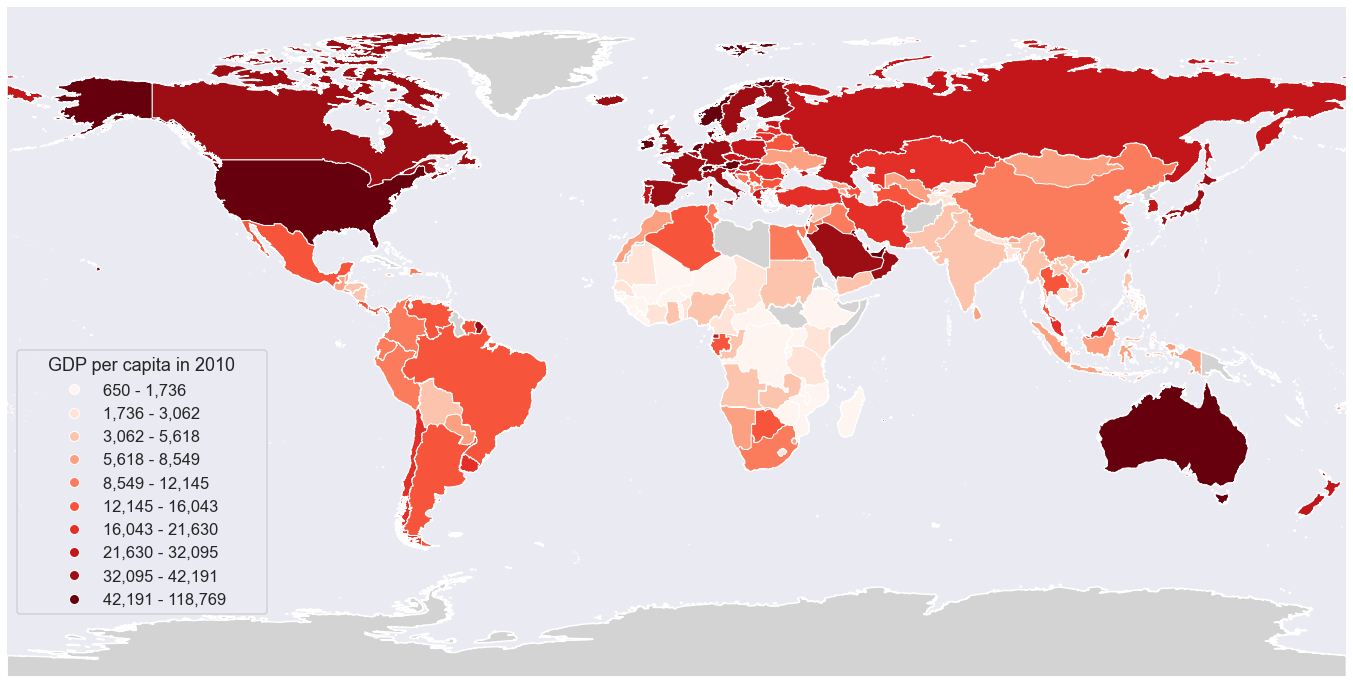

In [27]:
year = 2010
gdppc = pwt.loc[pwt.year==year].reset_index(drop=True).copy()
gdppc = countries.merge(gdppc, left_on='ADM0_A3', right_on='countrycode')
gdppc = gdppc.dropna(subset=['rgdpe_pc'])
mylegend = center_wrap(["GDP per capita in " + str(year)], cwidth=32, width=32)
MyChloropleth(mydf=gdppc, myfile='PWT_GDP_' + str(year), myvar='rgdpe_pc', mylegend=mylegend, k=10, scheme='Quantiles', save=True)

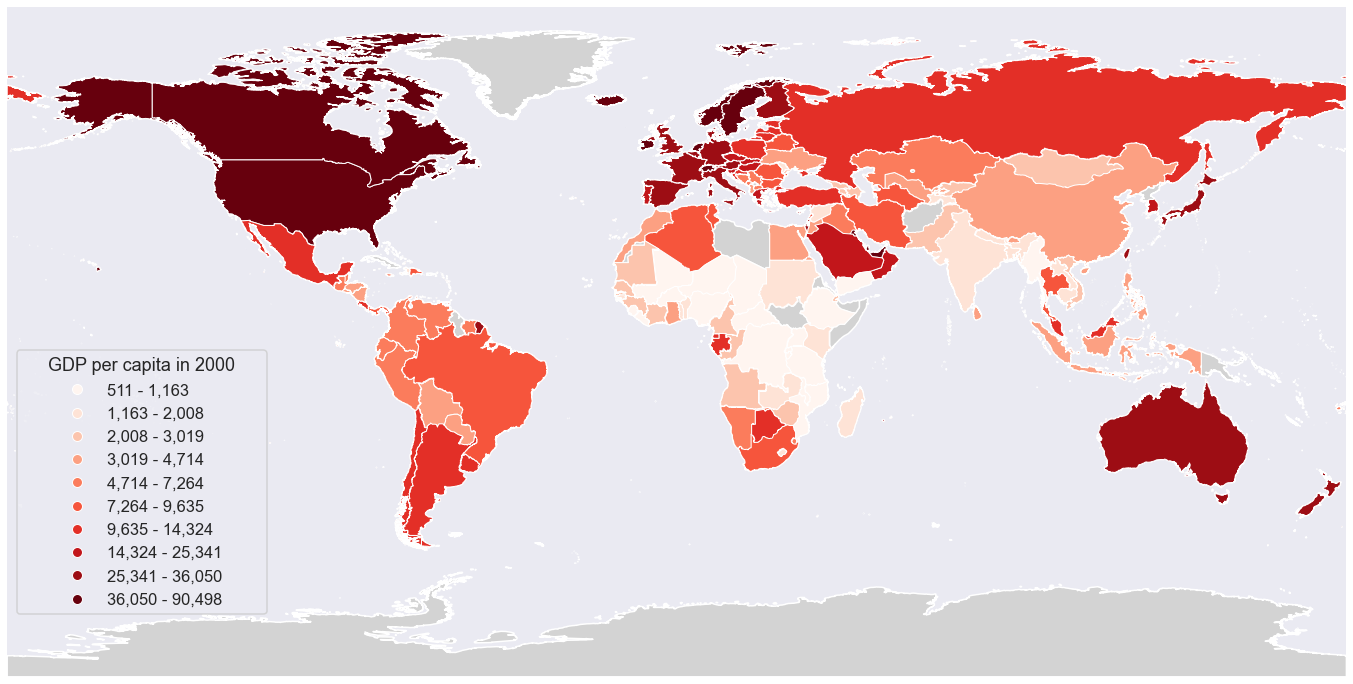

In [28]:
year = 2000
gdppc = pwt.loc[pwt.year==year].reset_index(drop=True).copy()
gdppc = countries.merge(gdppc, left_on='ADM0_A3', right_on='countrycode')
gdppc = gdppc.dropna(subset=['rgdpe_pc'])
mylegend = center_wrap(["GDP per capita in " + str(year)], cwidth=32, width=32)
MyChloropleth(mydf=gdppc, myfile='PWT_GDP_' + str(year), myvar='rgdpe_pc', mylegend=mylegend, k=10, scheme='Quantiles', save=True)

# GIS operations, functions and properties

Let's explore the data with some of the functions of ``geopandas``. 

Let's start by finding the centroid of every country and plot it.

/var/folders/q1/7qsx8kmj439d81kr4f_k_wbr0000gp/T/ipykernel_88099/1290617103.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = centroids.centroid


<GeoAxesSubplot:>

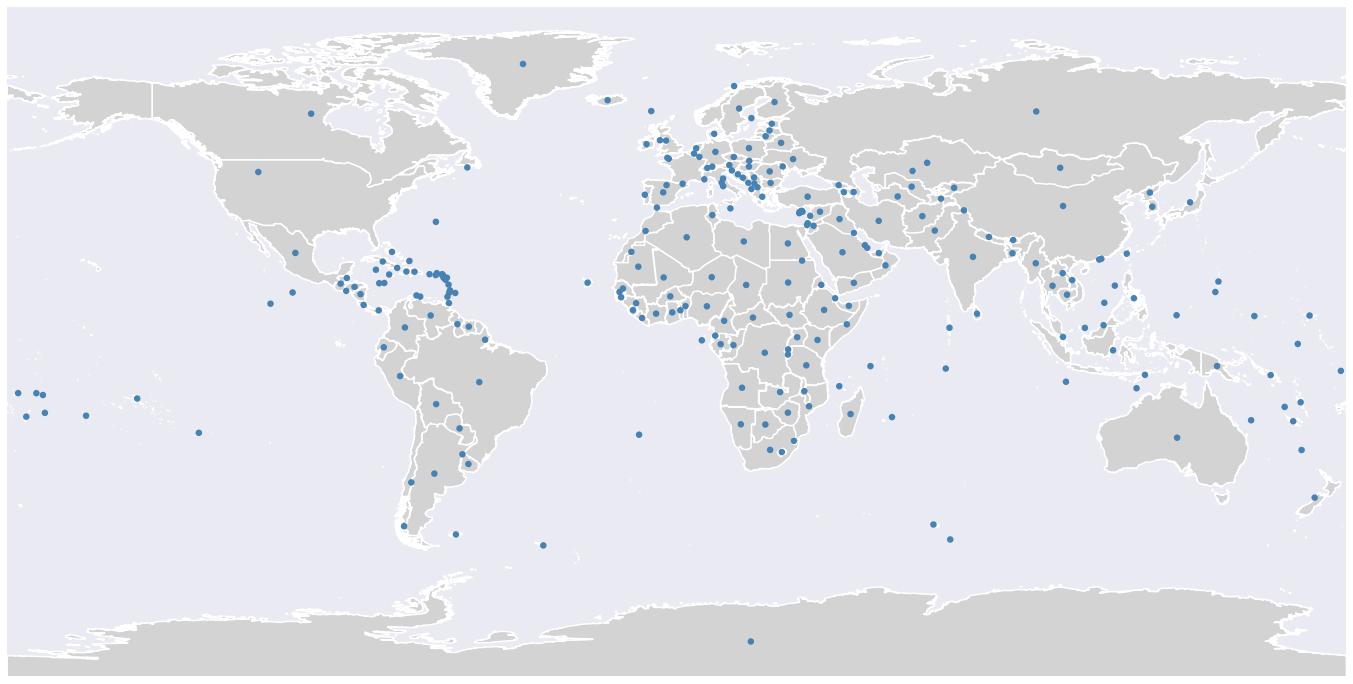

In [29]:
centroids = countries.copy()
centroids.geometry = centroids.centroid
ax = gplt.pointplot(
    centroids, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
    figsize=(24, 16),
    rasterized=True,
)
gplt.polyplot(countries.geometry, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
              edgecolor='white', facecolor='lightgray',
              extent=[-180, -90, 180, 90],
              ax=ax)

Let's compute distances between the centroids. For this we will use the ``geopy`` package. 

In [30]:
from geopy.distance import geodesic, great_circle
import itertools
centroids['xy'] = centroids.geometry.apply(lambda x: [x.y, x.x])

In [31]:
mypairs = pd.DataFrame(index = pd.MultiIndex.from_arrays(
                    np.array([x for x in itertools.product(centroids['ADM0_A3'].tolist(), repeat=2)]).T,
                    names = ['country_1','country_2'])).reset_index()
mypairs = mypairs.merge(centroids[['ADM0_A3', 'xy']], left_on='country_1', right_on='ADM0_A3')
mypairs = mypairs.merge(centroids[['ADM0_A3', 'xy']], left_on='country_2', right_on='ADM0_A3', suffixes=['_1', '_2'])
mypairs

,country_1,country_2,ADM0_A3_1,xy_1,ADM0_A3_2,xy_2
0,IDN,IDN,IDN,"[-2.222961002517387, 117.2704333391668]",IDN,"[-2.222961002517387, 117.2704333391668]"
1,MYS,IDN,MYS,"[3.7923928509530205, 109.6988684421668]",IDN,"[-2.222961002517387, 117.2704333391668]"
2,CHL,IDN,CHL,"[-37.74360663523242, -71.36437476479367]",IDN,"[-2.222961002517387, 117.2704333391668]"
3,BOL,IDN,BOL,"[-16.7068768105592, -64.68475372880839]",IDN,"[-2.222961002517387, 117.2704333391668]"
4,PER,IDN,PER,"[-9.154388480752162, -74.37806457210715]",IDN,"[-2.222961002517387, 117.2704333391668]"
...,...,...,...,...,...,...
66559,MAC,SCR,MAC,"[22.15778519834939, 113.55019686490209]",SCR,"[15.152112822000067, 117.75381196333339]"
66560,ATC,SCR,ATC,"[-12.432577176848286, 123.58636778644266]",SCR,"[15.152112822000067, 117.75381196333339]"
66561,BJN,SCR,BJN,"[15.795009963377407, -79.9878658593175]",SCR,"[15.152112822000067, 117.75381196333339]"
66562,SER,SCR,SER,"[15.864460896333414, -78.63811872766658]",SCR,"[15.152112822000067, 117.75381196333339]"


In [32]:
mypairs['geodesic_dist'] = mypairs.apply(lambda x: geodesic(x.xy_1, x.xy_2).km, axis=1)
mypairs['great_circle_dist'] = mypairs.apply(lambda x: great_circle(x.xy_1, x.xy_2).km, axis=1)
mypairs

,country_1,country_2,ADM0_A3_1,xy_1,ADM0_A3_2,xy_2,geodesic_dist,great_circle_dist
0,IDN,IDN,IDN,"[-2.222961002517387, 117.2704333391668]",IDN,"[-2.222961002517387, 117.2704333391668]",0.000000,0.000000
1,MYS,IDN,MYS,"[3.7923928509530205, 109.6988684421668]",IDN,"[-2.222961002517387, 117.2704333391668]",1073.341454,1074.915491
2,CHL,IDN,CHL,"[-37.74360663523242, -71.36437476479367]",IDN,"[-2.222961002517387, 117.2704333391668]",15491.447867,15482.921743
3,BOL,IDN,BOL,"[-16.7068768105592, -64.68475372880839]",IDN,"[-2.222961002517387, 117.2704333391668]",17899.591177,17899.294953
4,PER,IDN,PER,"[-9.154388480752162, -74.37806457210715]",IDN,"[-2.222961002517387, 117.2704333391668]",18217.220296,18207.778329
...,...,...,...,...,...,...,...,...
66559,MAC,SCR,MAC,"[22.15778519834939, 113.55019686490209]",SCR,"[15.152112822000067, 117.75381196333339]",893.135033,895.894345
66560,ATC,SCR,ATC,"[-12.432577176848286, 123.58636778644266]",SCR,"[15.152112822000067, 117.75381196333339]",3117.742839,3133.757085
66561,BJN,SCR,BJN,"[15.795009963377407, -79.9878658593175]",SCR,"[15.152112822000067, 117.75381196333339]",16072.183081,16060.602969
66562,SER,SCR,SER,"[15.864460896333414, -78.63811872766658]",SCR,"[15.152112822000067, 117.75381196333339]",16135.829664,16124.702173


In [33]:
mypairs.corr()

,geodesic_dist,great_circle_dist
geodesic_dist,1.000000,0.999997
great_circle_dist,0.999997,1.000000


Let's now use the cylindrical equal area projection and geopandas distance function to compute the distance between centroids.

In [34]:
centroids_cea = countries_cea.copy()
centroids_cea.reset_index(inplace=True)
centroids_cea.geometry = centroids_cea.centroid
centroids_cea['xy'] = centroids_cea.geometry.apply(lambda x: [x.y, x.x])
mypairs_cea = pd.DataFrame(index = pd.MultiIndex.from_arrays(
                    np.array([x for x in itertools.product(centroids_cea['ADM0_A3'].tolist(), repeat=2)]).T,
                    names = ['country_1','country_2'])).reset_index()
mypairs_cea = mypairs_cea.merge(centroids_cea[['ADM0_A3', 'geometry', 'xy']], left_on='country_1', right_on='ADM0_A3')
mypairs_cea = mypairs_cea.merge(centroids_cea[['ADM0_A3', 'geometry', 'xy']], left_on='country_2', right_on='ADM0_A3', suffixes=['_1', '_2'])

In [35]:
mypairs_cea['CEA_dist'] = mypairs_cea.apply(lambda x: x.geometry_1.distance(x.geometry_2)/1e3, axis=1)
mypairs_cea

,country_1,country_2,ADM0_A3_1,geometry_1,xy_1,ADM0_A3_2,geometry_2,xy_2,CEA_dist
0,IDN,IDN,IDN,POINT (13053566.271 -244402.485),"[-244402.48450644652, 13053566.271473162]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644652, 13053566.271473162]",0.000000
1,MYS,IDN,MYS,POINT (12211550.168 418637.642),"[418637.64215839974, 12211550.167696744]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644652, 13053566.271473162]",1071.733796
2,CHL,IDN,CHL,POINT (-7927268.774 -3670204.431),"[-3670204.4310665177, -7927268.774365341]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644652, 13053566.271473162]",21258.681949
3,BOL,IDN,BOL,POINT (-7201342.481 -1814919.515),"[-1814919.5145804633, -7201342.480506786]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644652, 13053566.271473162]",20315.704573
4,PER,IDN,PER,POINT (-8281824.471 -999164.638),"[-999164.6380899202, -8281824.470839065]",IDN,POINT (13053566.271 -244402.485),"[-244402.48450644652, 13053566.271473162]",21348.736825
...,...,...,...,...,...,...,...,...,...
66559,MAC,SCR,MAC,POINT (12640350.299 2390982.021),"[2390982.020614454, 12640350.299169885]",SCR,POINT (13108294.387 1656478.335),"[1656478.3353860602, 13108294.386725154]",870.900300
66560,ATC,SCR,ATC,POINT (13757571.530 -1364242.801),"[-1364242.8007381172, 13757571.529629342]",SCR,POINT (13108294.387 1656478.335),"[1656478.3353860602, 13108294.386725154]",3089.711474
66561,BJN,SCR,BJN,POINT (-8904208.497 1725054.531),"[1725054.5313122338, -8904208.497110264]",SCR,POINT (13108294.387 1656478.335),"[1656478.3353860602, 13108294.386725154]",22012.609702
66562,SER,SCR,SER,POINT (-8753955.334 1732450.150),"[1732450.149887001, -8753955.333704833]",SCR,POINT (13108294.387 1656478.335),"[1656478.3353860602, 13108294.386725154]",21862.381722


Let's merge the three distance measures and see how similar they are.

In [36]:
dists = mypairs[['country_1', 'country_2', 'geodesic_dist', 'great_circle_dist']].copy()
dists = dists.merge(mypairs_cea[['country_1', 'country_2', 'CEA_dist']])
dists

,country_1,country_2,geodesic_dist,great_circle_dist,CEA_dist
0,IDN,IDN,0.000000,0.000000,0.000000
1,MYS,IDN,1073.341454,1074.915491,1071.733796
2,CHL,IDN,15491.447867,15482.921743,21258.681949
3,BOL,IDN,17899.591177,17899.294953,20315.704573
4,PER,IDN,18217.220296,18207.778329,21348.736825
...,...,...,...,...,...
66559,MAC,SCR,893.135033,895.894345,870.900300
66560,ATC,SCR,3117.742839,3133.757085,3089.711474
66561,BJN,SCR,16072.183081,16060.602969,22012.609702
66562,SER,SCR,16135.829664,16124.702173,21862.381722


In [37]:
dists.corr()

,geodesic_dist,great_circle_dist,CEA_dist
geodesic_dist,1.000000,0.999997,0.855468
great_circle_dist,0.999997,1.000000,0.855163
CEA_dist,0.855468,0.855163,1.000000
